In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from numpy.random import rand

import matplotlib.pyplot as plt


In [2]:
train_data = pd.read_csv("1644871288_9762487_cleveland-train.csv")
train_data.columns.values[-1] = "positive"
train_data['positive'] = train_data['positive'].replace(-1,0)

test_data = pd.read_csv("1644871288_9775174_cleveland-test.csv")
test_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3
3,62,0,4,140,268,0,2,160,0,3.6,3,2,3
4,53,1,4,140,203,1,2,155,1,3.1,3,0,7


In [3]:
X = train_data.drop('positive', axis = 1).values
y = train_data['positive']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state= 20)


In [4]:
# weights = rand(X.shape[1])
weights = np.zeros(X.shape[1])
# bias = 0
bias = 1
costs_obtained = []
def normalize_data(X):
    
    return (X - X.mean())/X.std()

def sigmoid(z):
    return 1 / (1 + np.e**(-z))

def predict(X):
    z = bias + np.dot(X, weights)
    return [1 if i >= 0.5 else 0 for i in sigmoid(z)]


def cost_function(X,y):
    value=sigmoid(bias + np.dot(X, weights))
    val1=-y*np.log(value)
    val2=(1-y)*(np.log(1-value))
    final=val1-val2
    #final=np.squeeze(final)
    cost = np.sum(final)/len(X)
    return cost

def fit(X, y, iterations = 1000000, lr = 10**-5):
    global weights
    global bias
    global costs_obtained
    for i in range(iterations):
        y_pred = predict(X)
        weights -= lr * np.dot(X.T, y_pred - y)/len(X)
        bias = bias - lr*np.sum(y_pred-y)/len(X)
        costs_obtained.append(cost_function(X,y))
        if abs(max(weights)) < 10**-6 and abs(bias) < 10**-3:
            break


In [6]:
#For checking accuracy
#####This is a testing cell#######

X_norm_train = normalize_data(X_train)
fit(X_norm_train, y_train, 1000000)

In [7]:
X_norm_train

array([[-0.06074648, -0.58633309, -0.56069472, ..., -0.5735139 ,
        -0.58633309, -0.54787553],
       [ 0.27255235, -0.5735139 , -0.53505635, ..., -0.56069472,
        -0.56069472, -0.49659879],
       [-0.15048078, -0.5735139 , -0.5735139 , ..., -0.5735139 ,
        -0.58633309, -0.54787553],
       ...,
       [ 0.16999886, -0.5735139 , -0.5735139 , ..., -0.5735139 ,
        -0.56069472, -0.54787553],
       [ 0.15717968, -0.5735139 , -0.56069472, ..., -0.56069472,
        -0.58633309, -0.54787553],
       [ 0.15717968, -0.5735139 , -0.53505635, ..., -0.56069472,
        -0.56069472, -0.49659879]])

In [8]:
##For checking accuracy
#####This is a testing cell#######


X_norm_test = normalize_data(X_test)
predictions = predict(X_norm_test)

In [9]:
#####This is a testing cell#######

accuracy = 0
for i in range(len(predictions)):
    if predictions[i] == y_test.iloc[i]:
        accuracy += 1
print(f"Accuracy = {accuracy / len(predictions)}")

Accuracy = 0.3870967741935484


In [10]:
#####This is a testing cell#######

J = cost_function(X_test, y_test)
print("Cross Entropy error",J)

Cross Entropy error 1.1870893503304616


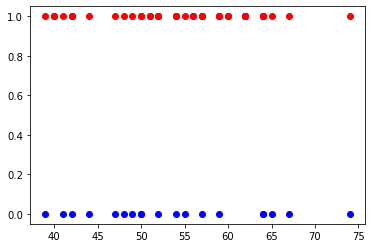

In [11]:
#####This is a testing cell#######

plt.clf()
plt.scatter(X_test[:,0], y_test, c = 'blue')
plt.scatter(X_test[:,0], predictions, c = "red")

plt.show()

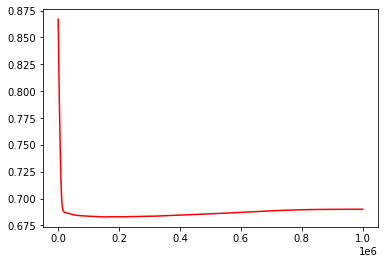

In [12]:
#####This is a testing cell#######

iters = 1000000
plt.plot(list(range(iters)), costs_obtained, '-r')

In [25]:
#For actual predictions
#####This cell is for prediction#######

# X_norm = normalize_data(X)
# fit(X_norm, y)


In [9]:
# X_test.shape

In [26]:
#For actual predictions
#####This cell is for prediction#######

# X_norm_test = normalize_data(test_data)
# predictions_output = predict(X_norm_test)


In [28]:
#####This cell is for prediction#######

for i in range(len(predictions_output)):
  
    if predictions_output[i] == 0:
        predictions_output[i] = -1


In [29]:
#####This cell is for prediction#######
predictions_output

[-1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1]

In [30]:
#####This cell is for prediction#######

new_file = open('predictions.dat','w')

for element in predictions_output:
      new_file.write(str(element))
      new_file.write('\n')
new_file.close()